In [3]:
import matplotlib.pyplot as plt
from random import choice

In [4]:
numbers = [1,2,3,4,5,6]
even = [2,4,6,8,10,12]

Creating simple line plot with specified font size for the parameters and titles and line thickness

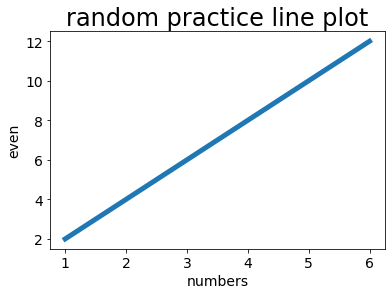

In [5]:
plt.plot(numbers,even, linewidth =5)
plt.xlabel('numbers', fontsize=14 )
plt.ylabel('even', fontsize=14)
plt.title('random practice line plot', fontsize=24)
plt.tick_params(axis = 'both', labelsize = 14)
plt.show()

Using Scatter plot

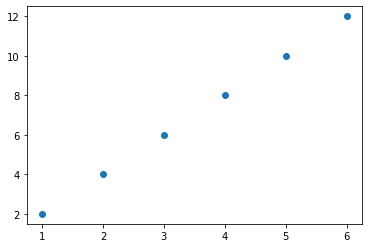

In [6]:
plt.scatter(numbers, even)

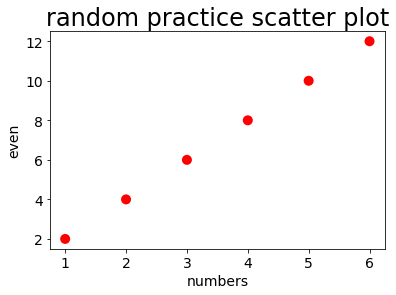

In [7]:
#adding size and other details
#s stands for size
#edgecolor is for borders around the dots
#c is color
plt.scatter(numbers, even,edgecolor = 'none',c = 'red', s=100)
plt.xlabel('numbers', fontsize=14 )
plt.ylabel('even', fontsize=14)
plt.title('random practice scatter plot', fontsize=24)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.show()

In [8]:
x =list(range(1,100))
x_squares = [i**2 for i in x]

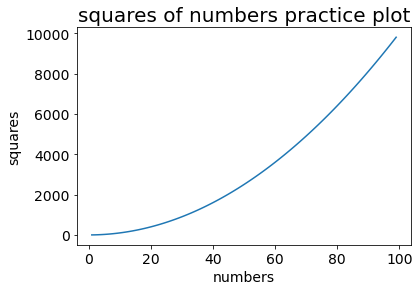

In [9]:
plt.plot(x,x_squares)
plt.xlabel('numbers', fontsize=14 )
plt.ylabel('squares', fontsize=14)
plt.title('squares of numbers practice plot', fontsize=20)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.show()

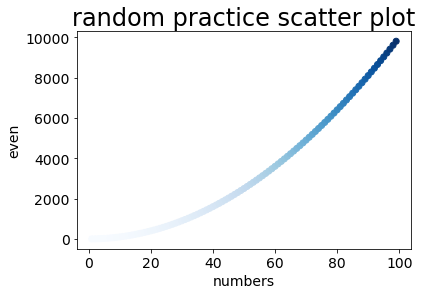

In [10]:
#making a color gradient where smaller values have lighter colors
plt.scatter(x,x_squares,c = x_squares, cmap = plt.cm.Blues)
plt.xlabel('numbers', fontsize=14 )
plt.ylabel('even', fontsize=14)
plt.title('random practice scatter plot', fontsize=24)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.show()

### Try it yourself
15-1. Cubes: A number raised to the third power is a cube. Plot the first five 
cubic numbers, and then plot the first 5000 cubic numbers.

15-2. Colored Cubes: Apply a colormap to your cubes plot.

In [11]:
num = list(range(1,5001))
num_cube = [i**3 for i in num]
num[:5]

[1, 2, 3, 4, 5]

Text(0.5, 1.0, 'Cubes of first five numbers')

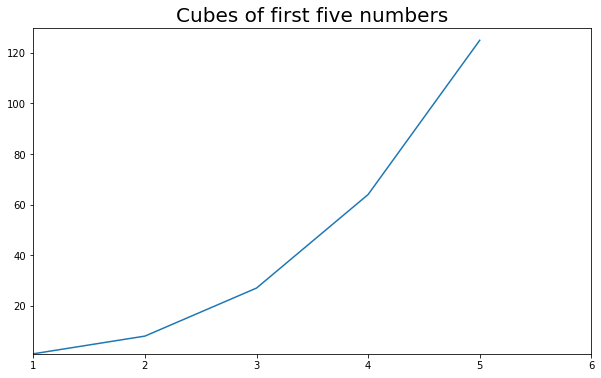

In [12]:
plt.figure(figsize = (10,6))
plt.plot(num[:5],num_cube[:5])
plt.axis([1,6,1,130]) #arranging the numbers I want on the axis
plt.title('Cubes of first five numbers', fontsize = 20)


### Note:
Always put figsize before the rest of the code for your visualization.

Text(0, 0.5, 'cubes of numbers')

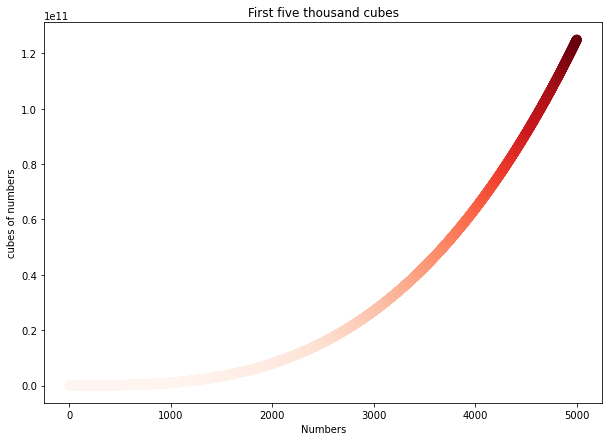

In [13]:
plt.figure(figsize = (10,7))
plt.scatter(num, 
            num_cube, 
            s = 80, 
            c = num_cube, 
            cmap = plt.cm.Reds)
plt.title('First five thousand cubes')
plt.xlabel('Numbers')
plt.ylabel('cubes of numbers')

In [14]:
num_cube[:5]

[1, 8, 27, 64, 125]

In [15]:
num_cube[-1]

125000000000

In [68]:
# Randomwalk class
class RandomWalk():
    '''A class to generate random walks'''
    def __init__(self, num_points = 100):
        '''initialize attributes of a walk'''
        self.num_points = num_points
        
        '''A walk always starts from (0,0)'''
        self.x_values = [0]
        self.y_values = [0]
        
    def fill_walk(self):
        '''calculate all points in the walk'''
        while len(self.x_values) < self.num_points:
            x_direction = choice([1,-1])
            x_distance = choice([0,1,2,3,4])
            x_steps = x_direction * x_distance
            
            y_direction = choice([1,-1])
            y_distance = choice([0,1,2,3,4])
            y_steps = y_direction * y_distance
            
            #reject steps that go nowhere
            if x_steps == 0 and y_steps == 0:
                continue
                
            #calculating the nest steps
            next_x = self.x_values[-1] + x_steps
            next_y = self.y_values[-1] + x_steps
            
            self.x_values.append(next_x)
            self.y_values.append(next_y)

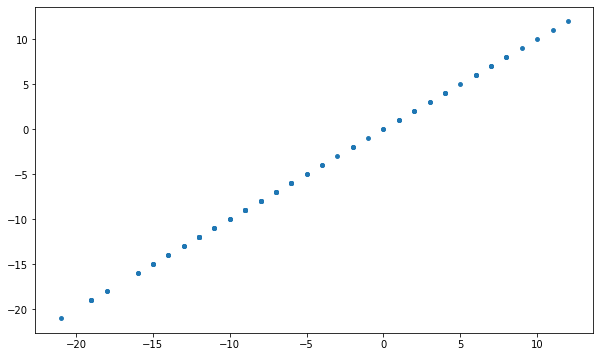

In [69]:
rw = RandomWalk() #Instantiating a class
rw.fill_walk()

plt.figure(figsize = (10,6))
plt.scatter(rw.x_values, rw.y_values, s = 15)
plt.show()

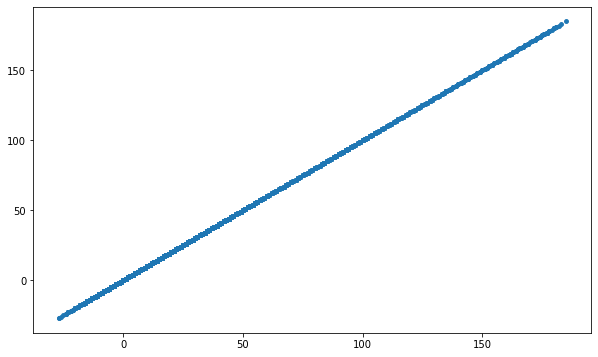

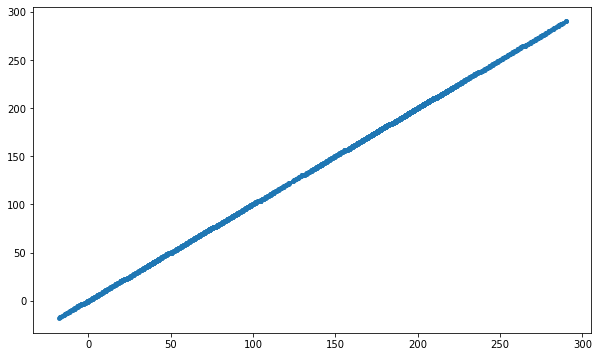

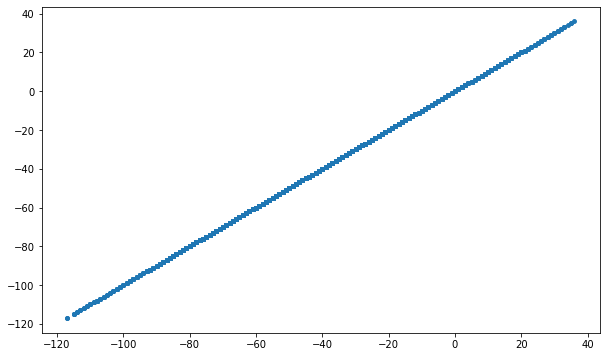

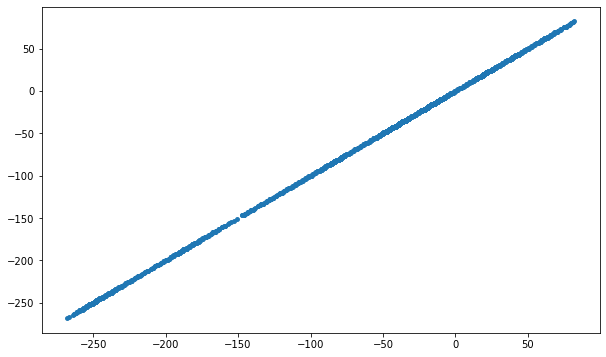

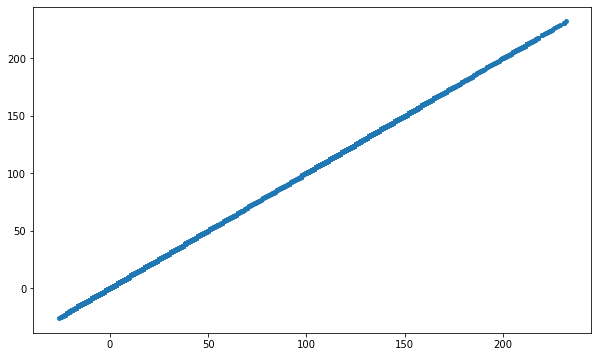

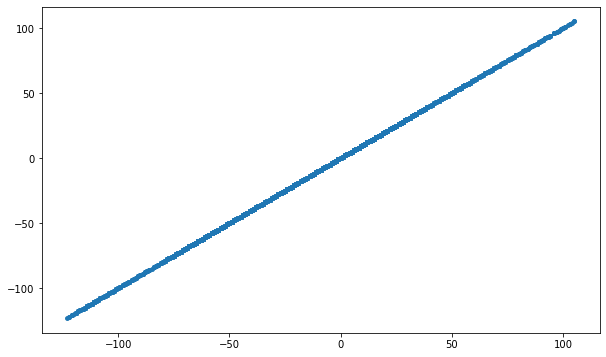

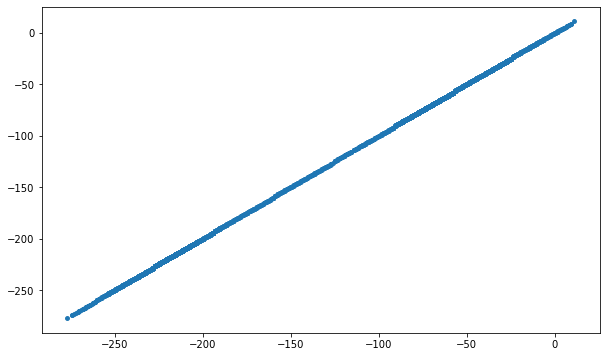

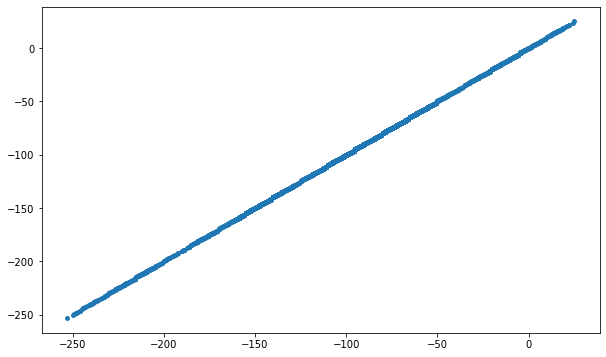

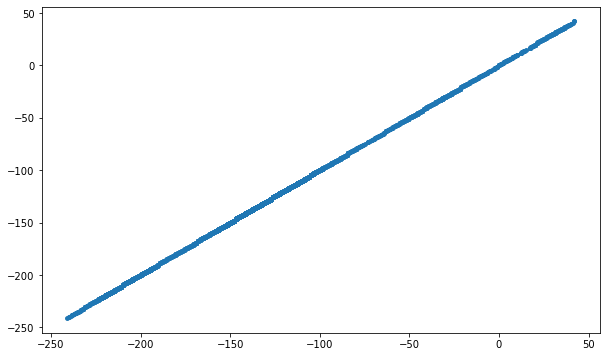

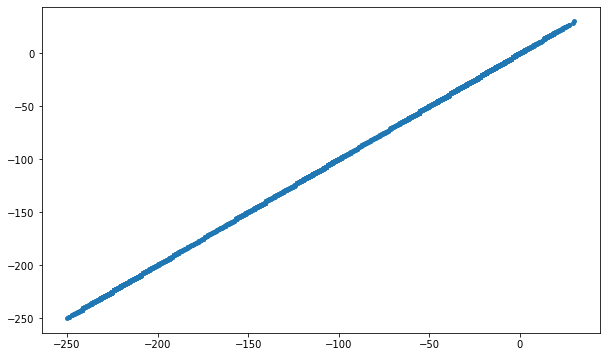

In [28]:
keep_running = 0
while keep_running  < 10:
    rw = RandomWalk() #Instantiating a class
    rw.fill_walk()

    plt.figure(figsize = (10,6))
    plt.scatter(rw.x_values, rw.y_values, s = 15)
    plt.show()
    
    keep_running += 1


## Rolling a die exercise

In [2]:
from random import randint
import pygal

In [3]:
class Die():
    '''a class for rolling a die'''
    def __init__(self, faces = 6):
        self.faces = faces
        
    def roll(self):
        '''possibility of rolls'''
        return randint(1,self.faces)

In [4]:
# For one die
die = Die()

results = []
for i in range(100):
    result = die.roll()
    results.append(result)

In [5]:
#analyze the results
frequencies = []
for value in range(1, die.faces + 1):
    frequency = results.count(value)
    frequencies.append(frequency)
    
frequencies

[24, 9, 14, 22, 16, 15]

In [85]:
# Visualize the results.
hist = pygal.Bar()

hist.title = "Results of rolling one D6 1000 times."
hist.x_labels = ['1', '2', '3', '4', '5', '6']
hist.x_title = "Result"
hist.y_title = "Frequency of Result"
hist.add('D6', frequencies)
hist.render_to_file('die_visual.svg')

In [21]:
# For two dies
die1 = Die()
die2 = Die()
results = []
for i in range(1000):
    result = die1.roll() + die2.roll()
    results.append(result)

In [22]:
#analyze the results
frequencies = []
max_results = die1.faces + die2.faces
for value in range(1, max_results + 1):
    frequency = results.count(value)
    frequencies.append(frequency)
    
frequencies

[0, 19, 63, 84, 114, 141, 157, 143, 109, 84, 58, 28]

In [23]:
# Visualize the results.
hist = pygal.Bar()

hist.title = "Results of rolling two dice 1000 times."
hist.x_labels = list(range(1,13))
hist.x_title = "Result"
hist.y_title = "Frequency of Result"
hist.add('D6 + D6', frequencies)
hist.render_to_file('two_dice_visual.svg')

In [34]:
#Two dice with different number of faces
die6 = Die()
die10 = Die(10)

results = []
for i in range(1000):
    result = die6.roll() + die10.roll()
    results.append(result)

frequencies = []
max_results = die6.faces + die10.faces
for i in range(1,max_results + 1):
    frequency = results.count(i)
    frequencies.append(frequency)
    
frequencies    

[0, 15, 30, 51, 81, 88, 116, 116, 83, 116, 96, 78, 47, 43, 28, 12]

In [35]:
hist.title = "Results of rolling two dice 1000 times."
hist.x_labels = list(range(1,17))
hist.x_title = "Result"
hist.y_title = "Frequency of Result"
hist.add('D6 + D10', frequencies)
hist.render_to_file('two_dice_that_have_different_faces_visual.svg')